In [1]:
# importer le notebook des fonctions utiles et des importations nécessaires
import nbimporter
from functions_and_imports import *

In [2]:
data = pd.read_csv('../../data/df_6H_imputed_with_knn.csv')
display_basic_info(data)

Shape of the DataFrame: (35064, 39)

Number of unique patients: 5844

SepsisLabel class counts:
 SepsisLabel
1.0    17532
0.0    17532
Name: count, dtype: int64

Number of unique patients per class in 'will_have_sepsis':
 will_have_sepsis
0.0    2922
1.0    2922
Name: Patient_ID, dtype: int64

Columns in the DataFrame:
 Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'TroponinI', 'Hct', 'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age',
       'Gender', 'HospAdmTime', 'SepsisLabel', 'Patient_ID',
       'will_have_sepsis'],
      dtype='object')

Data Types:
 Hour                float64
HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP         

In [3]:
# split
train_df, test_df = split_train_test_data_v2(data) 

# Extraction de séquences et normalisation
normalize_sequences_train, labels_train, normalize_sequences_test, labels_test, scaler = extract_sequences_and_normalize(train_df, test_df, exclude_columns=['Patient_ID', 'Hour', 'SepsisLabel'], drop_column ='will_have_sepsis', label_column='SepsisLabel', id_column='Patient_ID', time_column='Hour', sequence_length=6)

functions_and_imports.ipynb:360: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "    - sequence_length (int): La longueur de la séquence à extraire (par ex. 6).\n",
functions_and_imports.ipynb:361: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "    \n",


In [4]:
normalize_sequences_train.shape,labels_train.shape, normalize_sequences_test.shape,labels_test.shape

((4675, 6, 35), (4675,), (1169, 6, 35), (1169,))

In [15]:
def build_and_train_ann_model(X_train, y_train, X_val, y_val, input_shape, epochs=300, batch_size=128):
    """
    Construit et entraîne un modèle ANN pour la prédiction basée sur des données non séquentielles.

    Args:
    - X_train: Données d'entraînement.
    - y_train: Labels d'entraînement.
    - X_val: Données de validation.
    - y_val: Labels de validation.
    - input_shape: Tuple représentant la forme des données d'entrée (nombre de caractéristiques,).
    - epochs: Nombre d'époques d'entraînement.
    - batch_size: Taille du lot pour l'entraînement.

    Returns:
    - keras.models.Model: Modèle ANN entraîné.
    - keras.callbacks.History: Historique de l'entraînement.
    """
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(64, activation='relu'),
        Dropout(0.25),
        Dense(64, activation='relu'),
        Dropout(0.25),
        Dense(1, activation='sigmoid')  # Pour un problème de classification binaire
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    # Configuration de l'arrêt prématuré
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

    # Entraînement du modèle
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

    return model, history


In [16]:
input_shape = (6, 35)
model_ann, history_ann = build_and_train_ann_model(normalize_sequences_train, labels_train, normalize_sequences_test, labels_test, input_shape)


Epoch 1/300


C:\Users\AdminPC\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4898 - loss: 0.7248 - val_accuracy: 0.5047 - val_loss: 0.6938
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5035 - loss: 0.6991 - val_accuracy: 0.6347 - val_loss: 0.6844
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5491 - loss: 0.6854 - val_accuracy: 0.6570 - val_loss: 0.6746
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5648 - loss: 0.6797 - val_accuracy: 0.6698 - val_loss: 0.6627
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6062 - loss: 0.6712 - val_accuracy: 0.6647 - val_loss: 0.6538
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6220 - loss: 0.6605 - val_accuracy: 0.6784 - val_loss: 0.6474
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6391 - loss: 0.6544 - val_accuracy: 0.7459 - val_loss: 0.6355
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6591 - loss: 0.6421 - val_accuracy: 0.7793 - val_loss: 0.

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8458 - loss: 0.3528 - val_accuracy: 0.8683 - val_loss: 0.3322
Epoch 52/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8503 - loss: 0.3573 - val_accuracy: 0.8802 - val_loss: 0.3179
Epoch 53/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8558 - loss: 0.3465 - val_accuracy: 0.8828 - val_loss: 0.3169
Epoch 54/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8599 - loss: 0.3429 - val_accuracy: 0.8794 - val_loss: 0.3160
Epoch 55/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8454 - loss: 0.3514 - val_accuracy: 0.8854 - val_loss: 0.3150
Epoch 56/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8580 - loss: 0.3431 - val_accuracy: 0.8854 - val_loss: 0.3142
Epoch 57/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8573 - loss: 0.3392 - val_accuracy: 0.8828 - val_loss: 0.3123
Epoch 58/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8476 - loss: 0.3435 - val_accuracy: 0.8734 - val_lo

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8823 - loss: 0.2896 - val_accuracy: 0.8879 - val_loss: 0.2919
Epoch 102/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8727 - loss: 0.2994 - val_accuracy: 0.8879 - val_loss: 0.2840
Epoch 103/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8739 - loss: 0.3014 - val_accuracy: 0.8931 - val_loss: 0.2836
Epoch 104/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8789 - loss: 0.2785 - val_accuracy: 0.8879 - val_loss: 0.2884
Epoch 105/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8887 - loss: 0.2736 - val_accuracy: 0.8905 - val_loss: 0.2838
Epoch 106/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8756 - loss: 0.3019 - val_accuracy: 0.8896 - val_loss: 0.2832
Epoch 107/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8838 - loss: 0.2829 - val_accuracy: 0.8905 - val_loss: 0.2828
Epoch 108/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8788 - loss: 0.2970 - val_accuracy: 0.8896 -

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8860 - loss: 0.2621 - val_accuracy: 0.8939 - val_loss: 0.2730
Epoch 152/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8998 - loss: 0.2516 - val_accuracy: 0.8914 - val_loss: 0.2758
Epoch 153/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8973 - loss: 0.2549 - val_accuracy: 0.8931 - val_loss: 0.2735
Epoch 154/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8960 - loss: 0.2532 - val_accuracy: 0.8956 - val_loss: 0.2719
Epoch 155/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8912 - loss: 0.2630 - val_accuracy: 0.8939 - val_loss: 0.2729
Epoch 156/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8888 - loss: 0.2678 - val_accuracy: 0.8879 - val_loss: 0.2720
Epoch 157/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8970 - loss: 0.2589 - val_accuracy: 0.8905 - val_loss: 0.2712
Epoch 158/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8958 - loss: 0.2547 - val_accuracy: 0.8931 -

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9064 - loss: 0.2367 - val_accuracy: 0.8982 - val_loss: 0.2672
Epoch 202/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9145 - loss: 0.2273 - val_accuracy: 0.8999 - val_loss: 0.2652
Epoch 203/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9025 - loss: 0.2407 - val_accuracy: 0.8982 - val_loss: 0.2657
Epoch 204/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9072 - loss: 0.2406 - val_accuracy: 0.8948 - val_loss: 0.2655
Epoch 205/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9087 - loss: 0.2408 - val_accuracy: 0.8999 - val_loss: 0.2644
Epoch 206/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8982 - loss: 0.2383 - val_accuracy: 0.8948 - val_loss: 0.2677
Epoch 207/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9018 - loss: 0.2440 - val_accuracy: 0.8956 - val_loss: 0.2681
Epoch 208/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8931 - loss: 0.2527 - val_accuracy: 0.8991 -

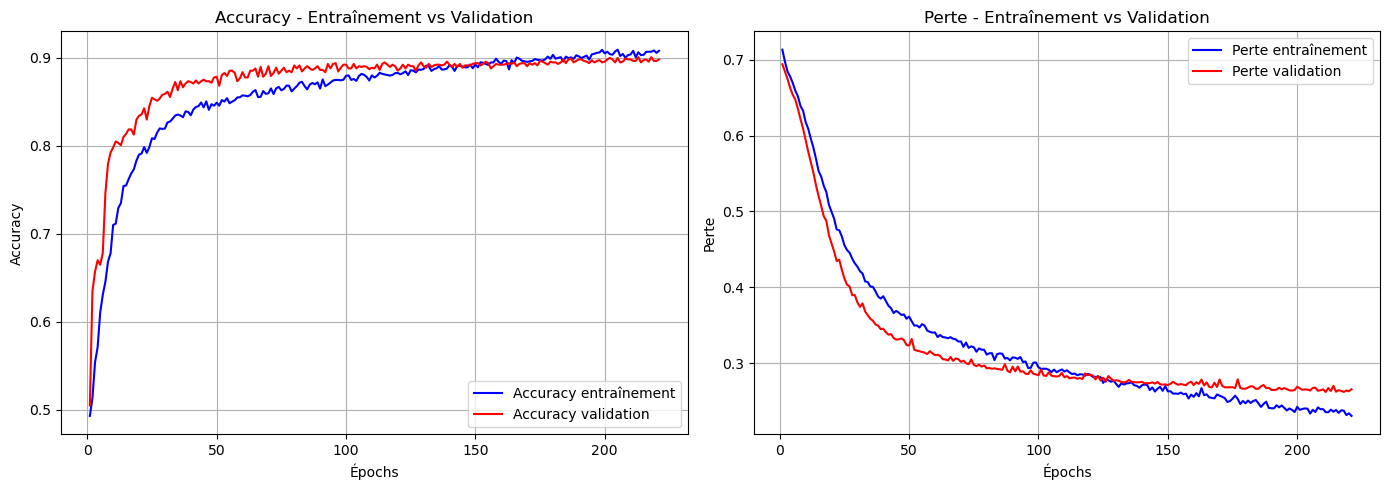

In [17]:
plot_training_history(history_ann)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8965
Precision: 0.8828
Recall: 0.9197
F1-Score: 0.9009
AUROC: 0.9565


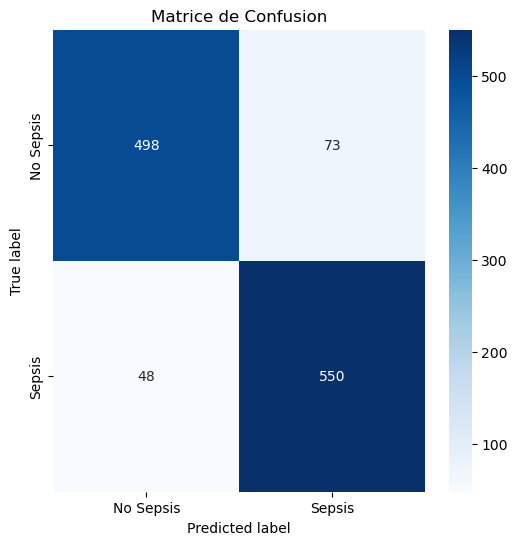

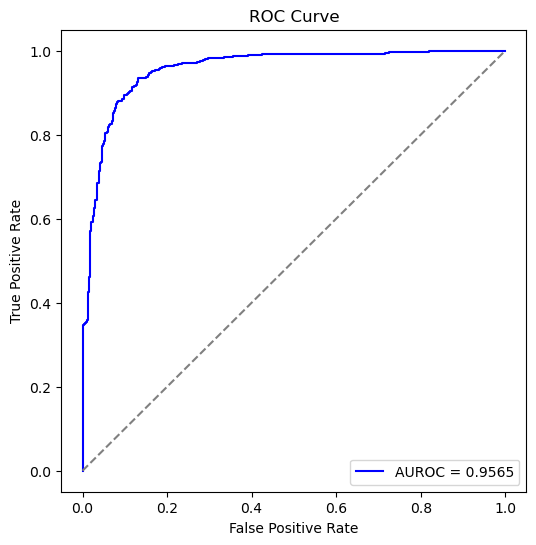

In [18]:
# Évaluer les performances du modèle sur les données de test
predict_prob, predict = evaluate_model_performance(model_ann, normalize_sequences_test, labels_test)